# Plot Stock Pair
Plots two stocks on a line graph with the same time axis for comparison. Correlation and cointegration tests are done to determine how good the pair is to trade on.

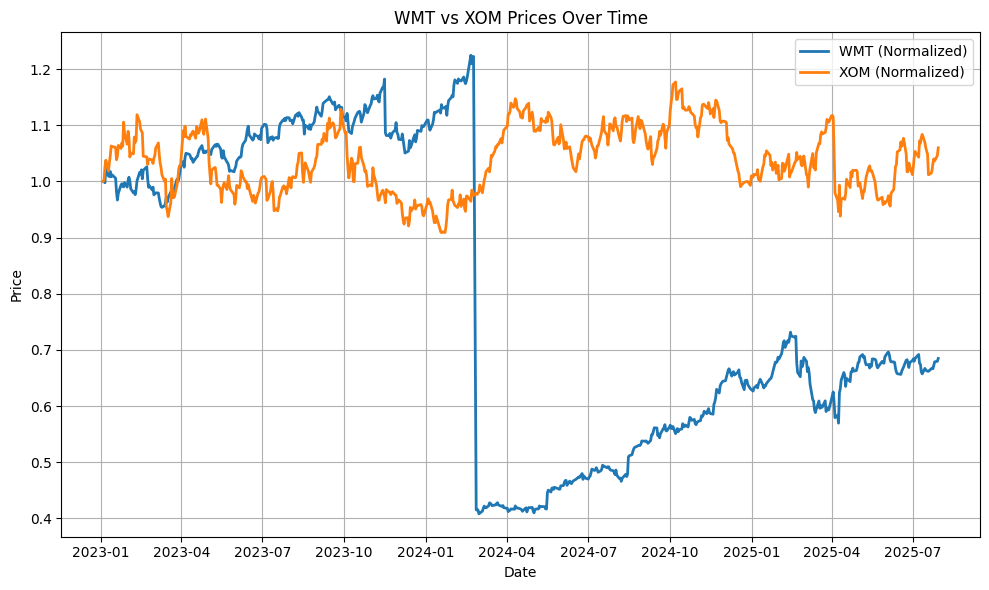

Cointegration p-value: 0.14252195070788753


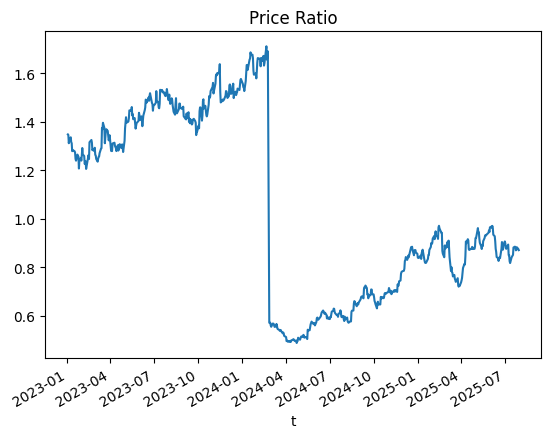

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Add parent directory to path
sys.path.append(os.path.abspath(".."))

# Now you can import from data
from data.fetch_data import fetch_pair_data

# Assume you have a DataFrame with aligned prices:
# e.g., from Alpaca or any source, with columns 'KO' and 'PEP'
stock_symbol1 = input("First stock symbol: ")
stock_symbol2 = input("Second stock symbol: ")
df = fetch_pair_data(stock_symbol1, stock_symbol2)

# Normalize and plot both stock price series
df_norm = df / df.iloc[0]  # Divide each column by its first value

plt.figure(figsize=(10, 6))
plt.plot(df_norm.index, df_norm[stock_symbol1], label=f'{stock_symbol1} (Normalized)', linewidth=2)
plt.plot(df_norm.index, df_norm[stock_symbol2], label=f'{stock_symbol2} (Normalized)', linewidth=2)

# Formatting
plt.title(f"{stock_symbol1} vs {stock_symbol2} Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()# Scatter plot

# Check correlation
df.corr()

# Price ratio
(df[stock_symbol1] / df[stock_symbol2]).plot(title="Price Ratio")

# Cointegration test
from statsmodels.tsa.stattools import coint

score, pvalue, _ = coint(df[stock_symbol1], df[stock_symbol2])
print("Cointegration p-value:", pvalue)